# Netflix Data Analysis
Authors: Alex Arce, Lunden Mandigo, Tyrone Pettygrue 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
imdb_movies = pd.read_csv('merged_movie_imdb.csv')


## Data Collection and Merging
Information on where we got the data and steps for merging, trimming, and uploading

### Data Description

**IMDB Movies**

In [ ]:
print(imdb_movies.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188554 entries, 0 to 188553
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      188554 non-null  int64  
 1   tconst          188554 non-null  object 
 2   titleType       188554 non-null  object 
 3   primaryTitle    188553 non-null  object 
 4   originalTitle   188553 non-null  object 
 5   isAdult         188554 non-null  int64  
 6   startYear       188554 non-null  int64  
 7   endYear         188554 non-null  object 
 8   runtimeMinutes  188554 non-null  object 
 9   genres          188554 non-null  object 
 10  averageRating   188554 non-null  float64
 11  numVotes        188554 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 17.3+ MB
None


,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
113356,1046134,tt27662333,movie,Out of Syllabus,Out of Syllabus,0,2024,\N,140,Drama,9.6,16
42875,593530,tt12134074,movie,Operndiven - Operntunten,Operndiven - Operntunten,0,2020,\N,53,Documentary,6.9,13
141753,1225819,tt4125220,movie,Isla Bonita,Isla Bonita,0,2015,\N,101,"Comedy,Drama",6.0,437
68509,770778,tt15502716,movie,Richie Gadi Pelli,Richie Gadi Pelli,0,2023,\N,114,"Comedy,Drama,Musical",7.3,3080
110381,1026438,tt26754518,movie,Into the Box,Into the Box,0,2024,\N,96,"Drama,Mystery",6.5,6


In [42]:
imdb_movies.sample(5)

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
25207,453155,tt0949835,movie,Passed the Door of Darkness,Passed the Door of Darkness,0,2008,\N,100,Thriller,3.4,205
186636,1523527,tt9573580,movie,History is Marching,History is Marching,0,2018,\N,135,Documentary,8.0,6
98117,956554,tt2247878,movie,Stab 4: Fresh Blood,Stab 4: Fresh Blood,0,2010,\N,75,Horror,6.1,90
159704,1342471,tt5923132,movie,Accel World: Infinite Burst,Akuseru wârudo: Infinite Burst,0,2016,\N,88,Animation,5.8,322
69938,779740,tt15727644,movie,Inauguration Day,O Dia da Posse,0,2021,\N,70,Documentary,5.3,15


In [ ]:

# There are 3,692 rows that have a missing value in genre column
imdb_movies['genres'].str.contains('N').value_counts()

# Filter out the rows with missing values and creating a new DataFrame
filter_genre_imdb_movies = imdb_movies[~imdb_movies['genres'].str.contains('N')]

filter_genre_imdb_movies


,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,18998,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91304
1,42061,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,\N,70,Drama,6.4,223
2,47980,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,6.7,8246
3,49331,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023,\N,78,"Drama,History",7.1,129
4,59593,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008,\N,94,Horror,5.9,1855
...,...,...,...,...,...,...,...,...,...,...,...,...
188549,1535880,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",6.4,6004
188550,1535885,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",4.5,22
188551,1535891,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,8.3,9
188552,1535904,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy,7.7,9


In [ ]:
# Create new column for main genre
filter_genre_imdb_movies['main_genre'] = filter_genre_imdb_movies['genres'].str.split(',').str[0]

# Checking if new column is created
filter_genre_imdb_movies

/var/folders/43/1s1k14jj2252cvfb942lyggh0000gn/T/ipykernel_85939/1321987670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_genre_imdb_movies['main_genre'] = filter_genre_imdb_movies['genres'].str.split(',').str[0]


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,main_genre
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91304,Comedy
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,\N,70,Drama,6.4,223,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,6.7,8246,Drama
3,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023,\N,78,"Drama,History",7.1,129,Drama
4,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008,\N,94,Horror,5.9,1855,Horror
...,...,...,...,...,...,...,...,...,...,...,...,...
188549,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",6.4,6004,Drama
188550,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",4.5,22,Adventure
188551,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,8.3,9,Drama
188552,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy,7.7,9,Comedy


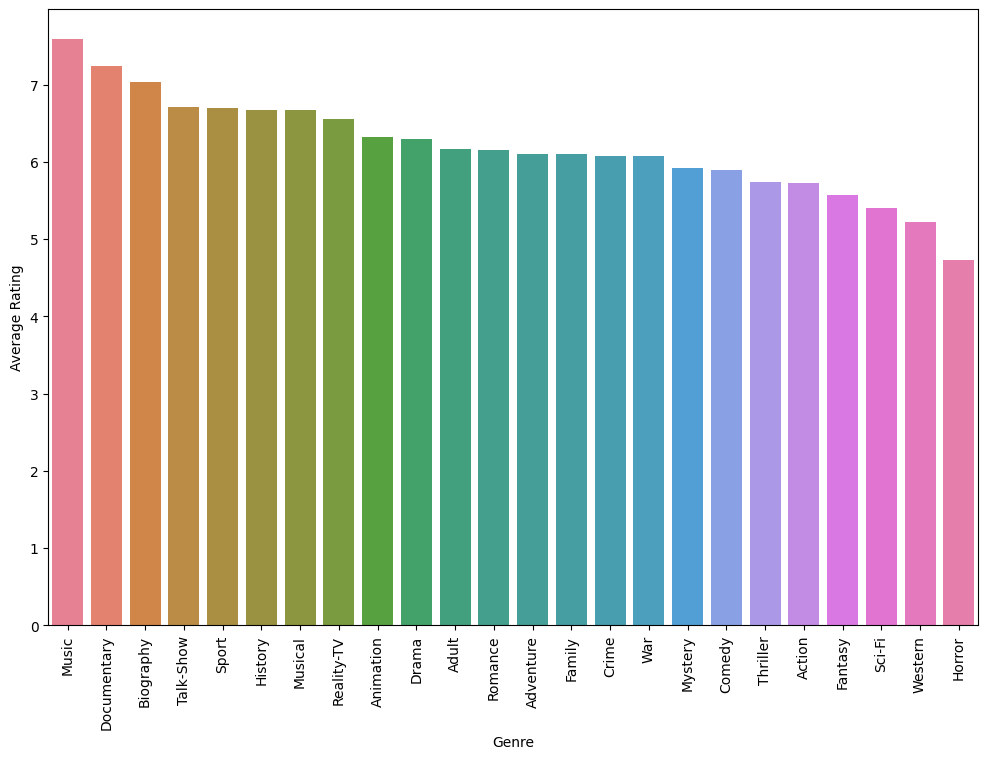

In [103]:
# Need to do a groupby for genre
main_genre_grouped = filter_genre_imdb_movies.groupby('main_genre')['averageRating'].mean().reset_index()



# Sorting rating from highest to lowest
main_genre_grouped = main_genre_grouped.sort_values('averageRating', ascending=False)

# Creation of visualization for highest rated genres 
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=main_genre_grouped['main_genre'], y=main_genre_grouped['averageRating'], hue=main_genre_grouped['main_genre'], ax=ax, label='Average Rating by main genre')
ax.set_xlabel("Genre")
ax.set_ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

## Results
- The main genre that has the highest average rating is Music and Documentaries falling slightly behind. 
- Within the data films that were categoized as "Music" had the highest average rating.
- We filtered the data to find the main genre for each fill in our DataFrame. The reason for this was due to some film having multiple genres like (Romance,Comedy). After review the data the first element in the genre column resulted as the main genre for each film.

### Finding the Top 5 Film that are over the average runtime and over 10,000 votes

In [ ]:
# Replacing all 'N' in runtimeMinutes to 0
filter_genre_imdb_movies.loc[
    filter_genre_imdb_movies['runtimeMinutes'].str.contains('N', na=False), 'runtimeMinutes'
] = 0

# Converting the dtype of runtimeMinutes to int
filter_genre_imdb_movies['runtimeMinutes'] = filter_genre_imdb_movies['runtimeMinutes'].astype('int')





AttributeError: Can only use .str accessor with string values!

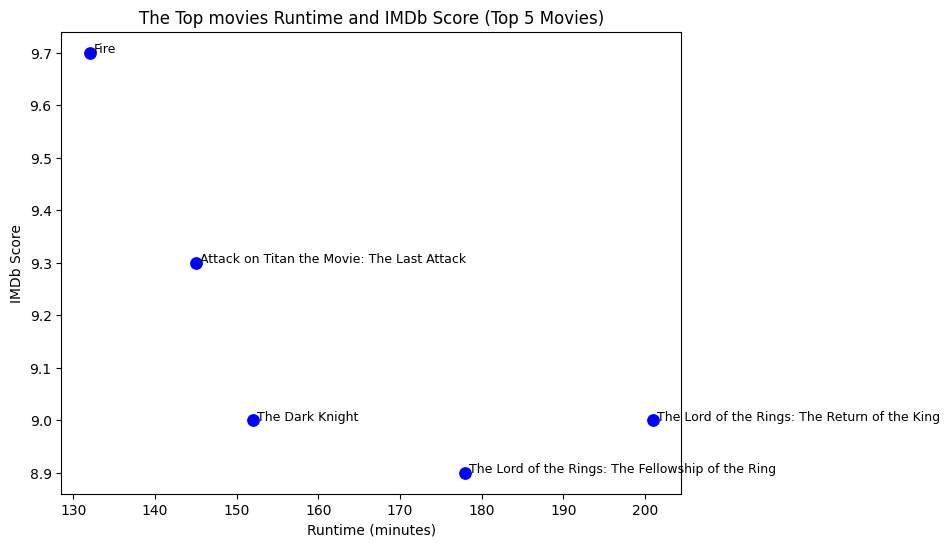

In [ ]:
# Filter for the top 5 movies by 'averageRating' and have over 10000 votes and over 120 minutes long
top5_movies = filter_genre_imdb_movies[
    (filter_genre_imdb_movies['runtimeMinutes'] > 120) &
    (filter_genre_imdb_movies['numVotes'] > 10000)
].sort_values('averageRating', ascending=False).head(5)



plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=top5_movies, x='runtimeMinutes', y='averageRating', s=100, color='b')

for i in range(top5_movies.shape[0]):
    # Use this line if you have a title column:
    label = top5_movies['primaryTitle'].iloc[i]

    # Text will display name of film over point
    plt.text(x=top5_movies['runtimeMinutes'].iloc[i] + 0.5,
             y=top5_movies['averageRating'].iloc[i],
             s=label,
             fontsize=9)

plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.title('The Top movies Runtime and IMDb Score (Top 5 Movies)')
plt.show()

## The Scatter plot displays the Top 5 films that meet our criteria
1. The top film being Fire
2. Based on this scatterplot it seems as if the longer a film is it drop in rating.
3. An explanation might be viewer will give a lower score due to fatigue 